In [119]:
import numpy as np
import pandas as pd
import netCDF4 as nc
import datetime as dt
import cartopy.crs as ccrs
import cartopy.util as cutil
import matplotlib.pyplot as plt

from shapely import geometry
from cartopy.io.img_tiles import Stamen

In [3]:
def nc_read(filename, variable):
    '''
    Read variable data from a NetCDF source
    :param filename:(string) complete path and file name
    :param variable: (string) name of variable
    :return: numpy array containing data
    '''
    
    data = nc.Dataset(filename)
    var = np.squeeze(data[variable][:])
    return var

In [4]:
def return_variable_data(file, var, t_units):
    time = nc_read(file, 'time')
    lats = nc_read(file, 'latitude')
    lons = nc_read(file , 'longitude')
    var = nc_read(file, var)

    time.units = t_units
    time = nc.num2date(time, time.units)
    
    return time, lats, lons, var

In [5]:
def spatial_extent_reduction(lat, lon, var):
    lat = lat[3:6]
    lon = lon[:-2]
    var = var[:,:,3:6,:-2]
    return lat, lon, var

In [91]:
def load_data(var):
    '''
    '''
    file = '/home/jovyan/Polynyas/data/ERA5/PineIslandPolynya_ERA5_data.nc'
    t_units = 'hours since 1900-01-01'
    time, lat, lon, var = return_variable_data(file, var, t_units)
    #lat, lon, var = spatial_extent_reduction(lat, lon, var)
    return time, lat, lon, var
    

In [128]:
def quick_visualisation(vardata, lon, lat, varname, date):
    lons, lats = np.meshgrid(lon, lat)
    plt.style.use('seaborn-bright')
    tiler = Stamen('terrain-background')
    mercator = tiler.crs

    fig = plt.figure(figsize=[14,14])
    ax = fig.add_subplot(1, 1, 1, projection=mercator)
    
#    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_extent([ -100, -102, -75.75, -74.25], ccrs.PlateCarree())
    #ax1.quiver(x, y, u, v, transform=vector_crs)

    #filled_c = ax.contourf(lons, lats, vardata,transform=ccrs.PlateCarree(),cmap='nipy_spectral')
    line_c = ax.contour(lons, lats, vardata, colors=['black'],transform=ccrs.PlateCarree())
    ax.clabel(
        line_c,  # Typically best results when labelling line contours.
        colors=['black'],
        manual=False,  # Automatic placement vs manual placement.
        inline=True,  # Cut the line where the label will be placed.
        fmt=' {:.0f} '.format,  # Labes as integers, with some extra space.
    )
    geom = geometry.box(minx=-101.8,maxx=-100.5,miny=-75.25,maxy=-74.8)
    ax.add_geometries([geom], crs=ccrs.PlateCarree(), facecolor='r', edgecolor='black', alpha=0.3)
    #fig.colorbar(filled_c, orientation='horizontal')
    ax.add_image(tiler, 6)
    ax.coastlines()
    ax.set_title('Quick Visualisation of {}'.format(varname)+'\n for {}'.format(date), fontsize=20, fontweight='bold', pad=20)
    
    #x,y = m(lons, lats)
    #m.drawcoastlines(linewidth=0.5)
    #cc = m.contourf(x,y,eof,cmap='RdBu_r')
    #cl = m.contour(x,y,eof,colors='k')
    #cbar = colorbar(cc,orientation='horizontal')
    #cbar.set_label(varname, fontsize=30)
    #cbar.ax.tick_params(labelsize=25)
    #plt.title('Quick Visualisation for {}'.format(varname), fontsize=30, fontweight='bold', pad=30)

In [126]:
def quick_visualisation_winds(u, v, lon, lat, varname, date):
    lons, lats = np.meshgrid(lon, lat)
    plt.style.use('seaborn-bright')
    tiler = Stamen('terrain-background')
    mercator = tiler.crs

    fig = plt.figure(figsize=[14,14])
    ax = fig.add_subplot(1, 1, 1, projection=mercator)
    
    ax.set_extent([ -100, -102, -75.75, -74.25], ccrs.PlateCarree())
    ax.quiver(lon,lat,u, v,units='xy', headwidth=3, transform=ccrs.PlateCarree())
    geom = geometry.box(minx=-101.8,maxx=-100.5,miny=-75.25,maxy=-74.8)
    ax.add_geometries([geom], crs=ccrs.PlateCarree(), facecolor='r', edgecolor='black', alpha=0.3)
    ax.add_image(tiler, 6)
    ax.coastlines()
    ax.set_title('Quick Visualisation of {}'.format(varname)+'\n for {}'.format(date), fontsize=20, fontweight='bold', pad=20)
    

In [60]:
def temporal_mean(period):
    '''
    Takes the temporal mean of the variable data for the given period. For user friendliness, we can pick either 'weekly', 'monthly', 'yearly' or 'seasonal' averages. 
    The 'seasonal' average will prompt the user to also include the 'season' of interest.
    '''

In [ ]:
def spatial_mean():
    '''
    Calculates the spatial mean of the data for the entire region.
    '''

Options for variables and corresponding variable names
- Mean sea level pressure: 'msl'
- Mean surface latent heat flux: 'mslhf'
- Mean surface sensible heat flux: 'msshf'
- Surface sensible heat flux: 'sshf'
- Sea surface temperature: 'sst'
- Zonal wind 10m above surface: 'U10'
- Meridional wind 10m above surface: 'V10'

[-74.   -74.25 -74.5  -74.75 -75.   -75.25 -75.5  -75.75 -76.  ] [-102.   -101.75 -101.5  -101.25 -101.   -100.75 -100.5  -100.25 -100.  ]


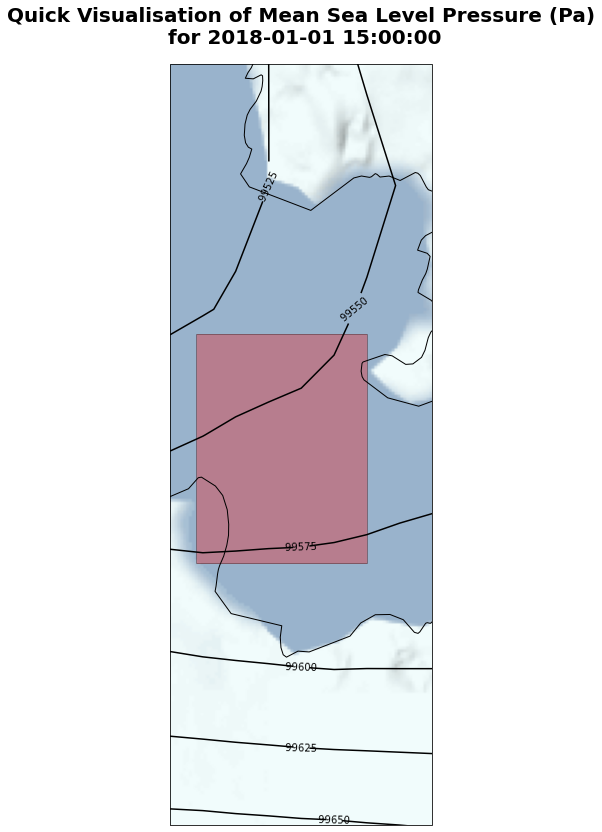

In [129]:
var = 'msl'
varname = 'Mean Sea Level Pressure (Pa)'
time, lats, lons, vardata = load_data(var)
quick_visualisation(vardata[0,0,:,:], lons, lats, varname, time[0])

[-74.   -74.25 -74.5  -74.75 -75.   -75.25 -75.5  -75.75 -76.  ] [-102.   -101.75 -101.5  -101.25 -101.   -100.75 -100.5  -100.25 -100.  ]
[-74.   -74.25 -74.5  -74.75 -75.   -75.25 -75.5  -75.75 -76.  ] [-102.   -101.75 -101.5  -101.25 -101.   -100.75 -100.5  -100.25 -100.  ]


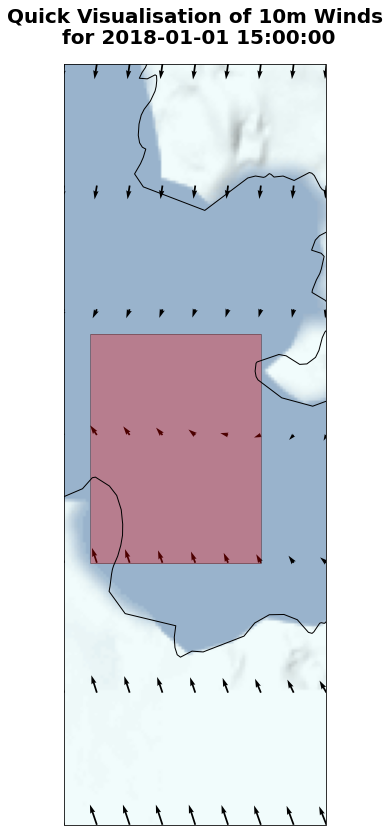

In [127]:
var_u = 'u10'
var_v = 'v10'
varname = '10m Winds'
time, lats, lons, vardata_u = load_data(var_u)
time, lats, lons, vardata_v = load_data(var_v)
quick_visualisation_winds(vardata_u[0,0,:,:], vardata_v[0,0,:,:], lons, lats, varname, time[0])